# <b> <center>Name: Neelanjan Dutta</b></center>

# <b> <center> Register number: 2448040 </b> </center>

# QUESTION 1:

# Use any Word2Vec relevant library like gensim, keras, etc to implement CBow and skipgram for dense vectorization.

## (a)Using gensim:

In [1]:
# !pip install gensim

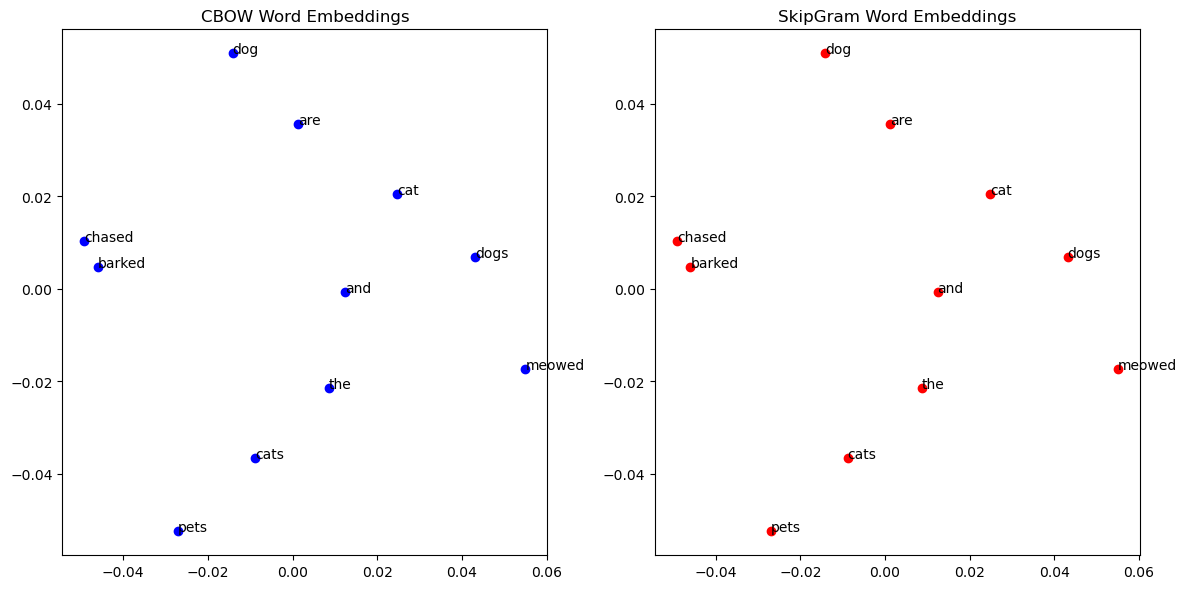

In [2]:
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Sample corpus
sentences = [
    ["the", "dog", "barked"],
    ["the", "cat", "meowed"],
    ["the", "dog", "chased", "the", "cat"],
    ["cats", "and", "dogs", "are", "pets"],
]

# CBOW model (sg=0)
cbow_model = Word2Vec(sentences, vector_size=50, window=3, sg=0, min_count=1, workers=2)
# SkipGram model (sg=1)
skipgram_model = Word2Vec(sentences, vector_size=50, window=3, sg=1, min_count=1, workers=2)

# Get word vectors
def get_reduced_vectors(model):
    words = list(model.wv.index_to_key)
    X = model.wv[words]
    X_reduced = PCA(n_components=2).fit_transform(X)
    return words, X_reduced

# Get CBOW and SkipGram reduced embeddings
words_cbow, X_cbow = get_reduced_vectors(cbow_model)
words_skip, X_skip = get_reduced_vectors(skipgram_model)

# Plot side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# CBOW plot
axs[0].scatter(X_cbow[:, 0], X_cbow[:, 1], c="blue")
for i, word in enumerate(words_cbow):
    axs[0].annotate(word, (X_cbow[i, 0], X_cbow[i, 1]))
axs[0].set_title("CBOW Word Embeddings")

# SkipGram plot
axs[1].scatter(X_skip[:, 0], X_skip[:, 1], c="red")
for i, word in enumerate(words_skip):
    axs[1].annotate(word, (X_skip[i, 0], X_skip[i, 1]))
axs[1].set_title("SkipGram Word Embeddings")

plt.tight_layout()
plt.show()

# (b) Using numpy:

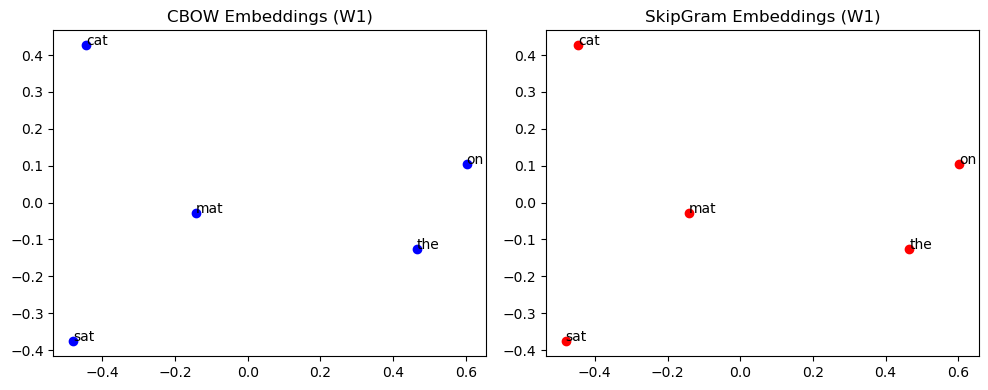

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ------------------------
# Step 1: Corpus & vocab
# ------------------------
corpus = "the cat sat on the mat".split()
vocab = list(set(corpus))
word2idx = {w: i for i, w in enumerate(vocab)}
idx2word = {i: w for w, i in word2idx.items()}
V = len(vocab)

# One-hot encoding
def one_hot(word):
    vec = np.zeros(V)
    vec[word2idx[word]] = 1
    return vec

# ------------------------
# Step 2: Generate pairs
# ------------------------
def generate_cbow_pairs(corpus, window_size=1):
    pairs = []
    for i in range(window_size, len(corpus) - window_size):
        context = [corpus[i - window_size], corpus[i + window_size]]
        target = corpus[i]
        pairs.append((context, target))
    return pairs

def generate_skipgram_pairs(corpus, window_size=1):
    pairs = []
    for i in range(window_size, len(corpus) - window_size):
        target = corpus[i]
        context = [corpus[i - window_size], corpus[i + window_size]]
        for c in context:
            pairs.append((target, c))
    return pairs

cbow_pairs = generate_cbow_pairs(corpus)
skipgram_pairs = generate_skipgram_pairs(corpus)

# ------------------------
# Step 3: Initialize weights
# ------------------------
np.random.seed(42)
embedding_dim = 5
W1 = np.random.rand(V, embedding_dim)  # input → hidden
W2 = np.random.rand(embedding_dim, V)  # hidden → output

# ------------------------
# Step 4: Forward passes
# ------------------------
def cbow(context, target):
    x = np.mean([one_hot(w) for w in context], axis=0)
    h = np.dot(x, W1)
    u = np.dot(h, W2)
    y_pred = np.exp(u) / np.sum(np.exp(u))
    return y_pred

def skipgram(target, context):
    x = one_hot(target)
    h = np.dot(x, W1)
    u = np.dot(h, W2)
    y_pred = np.exp(u) / np.sum(np.exp(u))
    return y_pred

# ------------------------
# Step 5: Visualize embeddings
# ------------------------
def plot_embeddings(W, title, color):
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(W)
    plt.scatter(reduced[:, 0], reduced[:, 1], c=color)
    for i, word in enumerate(vocab):
        plt.annotate(word, (reduced[i, 0], reduced[i, 1]))
    plt.title(title)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plot_embeddings(W1, "CBOW Embeddings (W1)", "blue")

plt.subplot(1, 2, 2)
plot_embeddings(W1, "SkipGram Embeddings (W1)", "red")

plt.tight_layout()
plt.show()

# Question 2:

# Follow the NLP and ML methodology to implement dense vectorization.

In [4]:
import gensim
from gensim.models import Word2Vec

# New sample sentences (sentiment-like)
reviews = [
    ["i", "love", "this", "movie"],
    ["this", "film", "is", "fantastic"],
    ["i", "hate", "this", "movie"],
    ["this", "film", "is", "terrible"],
]

# Train SkipGram
model = Word2Vec(reviews, vector_size=50, window=2, sg=1, min_count=1, workers=2)

# Check word similarities
print("Similarity (love, fantastic):", model.wv.similarity("love", "fantastic"))
print("Similarity (hate, terrible):", model.wv.similarity("hate", "terrible"))

# Nearest words
print("Most similar to 'movie':", model.wv.most_similar("movie"))

Similarity (love, fantastic): 0.18458433
Similarity (hate, terrible): 0.1833946
Most similar to 'movie': [('fantastic', 0.0449172779917717), ('love', -0.010146031156182289), ('this', -0.014475265517830849), ('hate', -0.04407211393117905), ('film', -0.15515565872192383), ('is', -0.17424817383289337), ('i', -0.20600517094135284), ('terrible', -0.2091004103422165)]
